In [49]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


## Data loading and exploration

In [50]:
data=pd.read_csv('customer_churn.csv')
pd.set_option('display.max_columns', None)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [51]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [52]:
for column in data.columns:
    print(f"Value counts for {column}:\n{data[column].value_counts()}\n")

Value counts for customerID:
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

Value counts for gender:
Male      3555
Female    3488
Name: gender, dtype: int64

Value counts for SeniorCitizen:
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Value counts for Partner:
No     3641
Yes    3402
Name: Partner, dtype: int64

Value counts for Dependents:
No     4933
Yes    2110
Name: Dependents, dtype: int64

Value counts for tenure:
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

Value counts for PhoneService:
Yes    6361
No      682
Name: PhoneService, dtype: int64

Value counts for MultipleLines:
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Value cou

In [53]:
# many columns have the same values - Yes/No/No internet service

## Converting catagorical columns

In [54]:
data_yn = pd.DataFrame({'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling'}) 
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
encoded_yn_columns = pd.DataFrame()

## Droping unnecceary columns

In [55]:
data2 =data[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'Churn']]
data2.head(10)

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes
5,8,0,99.65,Yes
6,22,0,89.10,No
7,10,0,29.75,No
8,28,0,104.80,Yes
9,62,0,56.15,No


In [56]:
data2['MonthlyCharges'].value_counts().index

Float64Index([20.05, 19.85, 19.95,  19.9,  20.0,  19.7, 19.65, 19.55, 20.15,
              19.75,
              ...
              81.75, 58.65, 57.45, 35.35,  92.1, 23.65, 114.7, 43.65,  87.8,
               78.7],
             dtype='float64', length=1585)

In [57]:
numeric= data2.select_dtypes('number')

<Axes: >

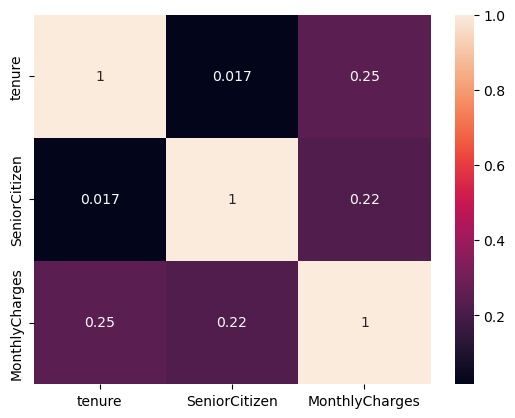

In [58]:
corr_matrix = numeric.corr()
sns.heatmap(corr_matrix,annot=True)

In [59]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

x_num = data2.select_dtypes(include=np.number) # Split data
X_cat = data2.select_dtypes(include=object)

In [60]:
#Scaling 
transformer = MinMaxScaler().fit(x_num)
x_normalized = transformer.transform(x_num)

In [61]:
x_norm = pd.DataFrame(x_normalized, columns = x_num.columns)
x_norm.head()

,tenure,SeniorCitizen,MonthlyCharges
0,0.013889,0.0,0.115423
1,0.472222,0.0,0.385075
2,0.027778,0.0,0.354229
3,0.625000,0.0,0.239303
4,0.027778,0.0,0.521891


In [62]:
y = data2['Churn']
X = data2.drop('Churn', axis=1) #dropping the target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) #20% test and 80% train

In [66]:
print(X_train.shape)
print(x_num.shape)

(5634, 3)
(7043, 3)


In [67]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Supongamos que x_num son las columnas numéricas que deseas escalar
X_train_num = X_train.select_dtypes(include=np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_train_norm

,tenure,SeniorCitizen,MonthlyCharges
0,0.611111,0.0,0.358706
1,0.375000,0.0,0.769652
2,0.027778,0.0,0.504478
3,0.027778,0.0,0.020896
4,0.166667,1.0,0.652239
...,...,...,...
5629,0.625000,0.0,0.076119
5630,0.041667,0.0,0.022886
5631,1.000000,0.0,0.499005
5632,0.069444,0.0,0.615920


In [70]:
data2.dtypes

tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
Churn              object
dtype: object

## LINEAR RELATION ON logit

In [72]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [73]:
LR.predict_proba(X_train)

array([[0.92683654, 0.07316346],
       [0.57617274, 0.42382726],
       [0.44203895, 0.55796105],
       ...,
       [0.97437091, 0.02562909],
       [0.39670385, 0.60329615],
       [0.34928834, 0.65071166]])

In [75]:
logits = np.log(1/LR.predict_proba(X_train)[:,1]-1)

In [77]:
import matplotlib.pyplot as plt

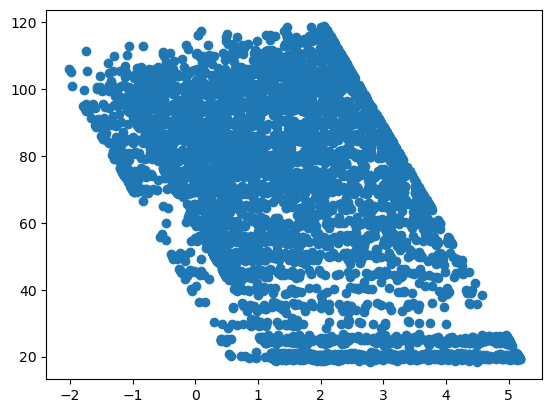

In [78]:
plt.scatter(logits,X_train['MonthlyCharges'])

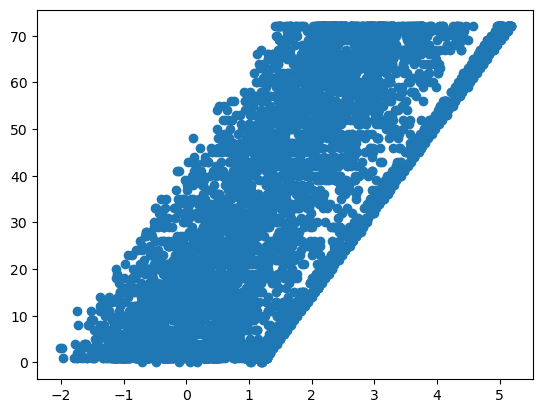

In [82]:
plt.scatter(logits,X_train['tenure'])

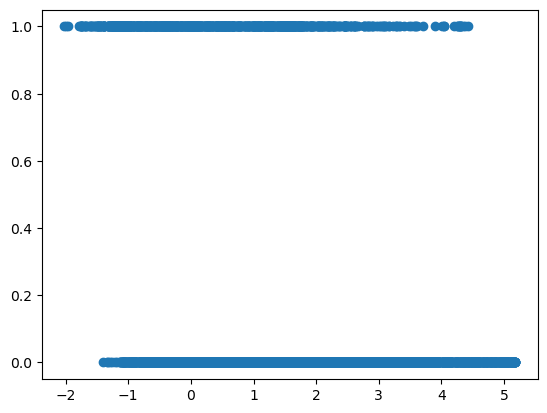

In [83]:
plt.scatter(logits,X_train['SeniorCitizen'])

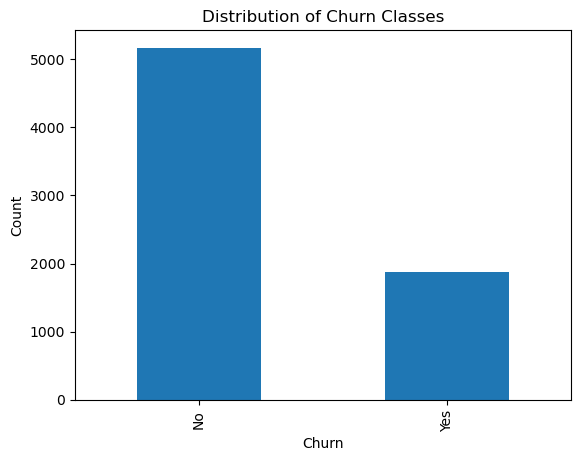

In [86]:
import matplotlib.pyplot as plt

# Obtén el conteo de las clases en la columna 'Churn'
count_classes = data2['Churn'].value_counts()

# Crea un gráfico de barras
count_classes.plot(kind='bar')

# Añade etiquetas y título al gráfico
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Distribution of Churn Classes')

# Muestra el gráfico
plt.show()


In [87]:
5100/(5100+1800)

0.7391304347826086

In [90]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.7757274662881476

In [94]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test)

print("precision: ", precision_score(y_test, pred, pos_label='Yes'))
print("recall: ", recall_score(y_test, pred, pos_label='Yes'))
print("f1: ", f1_score(y_test, pred, pos_label='Yes'))


precision:  0.6197183098591549
recall:  0.4583333333333333
f1:  0.5269461077844311


In [95]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[917, 108],
       [208, 176]])

### Oversampling / undersampling (NOT APPLIED)

In [97]:
train = pd.concat([X_train, y_train],axis=1)
train.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
5066,44,0,54.30,No
390,27,0,95.60,No
1007,2,0,68.95,Yes
5087,2,0,20.35,No
2939,12,1,83.80,Yes


### SMOTE

In [112]:
from imblearn.over_sampling import SMOTE

In [113]:
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train,y_train)

In [114]:
X_train_SMOTE.shape

(8298, 3)

In [116]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test)

In [117]:
print("precision: ", precision_score(y_test, pred, pos_label='Yes'))
print("recall: ", recall_score(y_test, pred, pos_label='Yes'))
print("f1: ", f1_score(y_test, pred, pos_label='Yes'))

precision:  0.47676419965576594
recall:  0.7213541666666666
f1:  0.5740932642487045


After applying SMOTE, the model is more effective at identifying positive cases, as reflected in the increased recall.
However, this improvement in recall comes at the cost of precision, which has decreased. The model now tends to classify more cases as positive, including some false positives.
